# Prepare NEH Grant Products Data

<b>Author:</b> Jaren Haber, PhD </br>
<b>Date</b>: September 16, 2023 </br>
<b>Description</b>: This notebook imports NEH grant product data from the web and combines the different products into a single, large DataFrame. <br/>

## Initialize

In [1]:
# Import packages
import pandas as pd
import numpy as np
from os.path import join

# Import local function(s)
from utils import get_unzip

## Import data from web

In [2]:
# Define URL of zipped file
data_url = 'https://apps.neh.gov/open/data/NEH_GrantProducts.zip'
fpath = '../data'

# Download zipped file and extract
get_unzip(data_url, fpath)

## Combine data for all product types

In [3]:
# Define file suffixes for grant product types
product_types = [
    'Collections', 
    'Articles', 
    'BlogPosts', 
    'Books', 
    'BookSections', 
    'Buildings', 
    'Catalogs', 
    'Centers', 
    'ComputerPrograms', 
    'ConferencePresentations', 
    'ConferenceInstituteSeminars', 
    'CourseMaterials', 
    'DatabaseEditions', 
    'Equipment', 
    'Exhibitions', 
    'FilmBroadcasts', 
    'Games', 
    'OpenAccessItems', 
    'Presentations', 
    'RadioBroadcasts', 
    'Reports', 
    'Scripts', 
    'Positions', 
    'WebResources'
]

In [4]:
## Load each product type and combine into one large DataFrame
dfs = [] # Create empty list for grant product DataFrames

# Loop over product types and add to long list of DFs
for product in product_types: 
    product_df = pd.read_xml(join('../data/NEH_GrantProducts', f'NEH_{product}.xml'))
    product_df['ProductType'] = product
    dfs.append(product_df)
    
df = pd.concat(dfs) # Combine DFs

In [5]:
# Inspect full data
print("Count of rows, columns in full data:", df.shape)
print(f"These are the {str(len(df.columns))} column names:")
print(", ".join([col for col in df.columns]))
print()
df.sample(5).iloc[:,:20] # Show first 20 columns of 5 random rows

Count of rows, columns in full data: (22609, 44)
These are the 44 column names:
ID, ApplicationNumber, Abstract, Address, Director, Name, PrimaryURL, PrimaryURLDescription, SecondaryURL, SecondaryURLDescription, Year, ProductType, AccessModel, Author, Format, PeriodicalTitle, Publisher, Title, BlogTitle, Date, Website, Editor, ISBN, Translator, Type, BookTitle, CatalogType, ProgrammingLanguage_Platform, SourceAvailable, ConferenceName, DateRange, Location, Audience, Description, Curator, Producer, Writer, PublicationType, URL3, URL3Description, URL4, URL4Description, URL5, URL5Description



,ID,ApplicationNumber,Abstract,Address,Director,Name,PrimaryURL,PrimaryURLDescription,SecondaryURL,SecondaryURLDescription,Year,ProductType,AccessModel,Author,Format,PeriodicalTitle,Publisher,Title,BlogTitle,Date
4837,9423,FE-20398-86,None,NaN,NaN,NaN,None,None,None,None,0.0,Books,None,"Weiss, Susan Forscher",NaN,NaN,UNAVAILABLE,MIML: Musical Instruction and Musical Learning,NaN,NaN
5836,10929,FA-53215-07,In Machiavelli's Politics I argue that he pres...,NaN,NaN,NaN,None,None,None,None,2017.0,Books,None,Catherine H. Zuckert,NaN,NaN,University of Chicago Press,MACHIAVELLI'S POLITICS,NaN,NaN
269,22065,TR-266364-19,"Astrophysicist, folklorist, &amp; science comm...",NaN,None,NaN,http://publish.prx.org/story/394343,PRX podcast,None,None,NaN,RadioBroadcasts,Free,NaN,Digital File,NaN,NaN,World-building in Sci-fi and Fantasy with Dr. ...,NaN,2022
2874,8036,FA-*0092-80,None,NaN,NaN,NaN,https://www.worldcat.org/search?q=9780824819910,WorldCat entry,None,None,1987.0,Books,None,"Najita, Tetsuo",NaN,NaN,Chicago: University of Chicago Press,Visions of Virtue in Tkugawa Japan,NaN,NaN
50,349,RA-50003-03,The middle decades of the sixteenth century wi...,NaN,NaN,NaN,None,None,None,None,2008.0,Articles,None,"Casale, Giancarlo",Journal,Itinerario,None,Ottoman Guerre de Course and the Intercontinen...,NaN,NaN


## Clean up `Abstract` and `Year` columns

In [6]:
## Clean up 'Abstract' column: many null entries (don't remove empties for now)
# Define dictionary containing specific 'no abstract' language
null_dict = {'^([Nn]o\s+)?[Aa]bstract\s?(not\s+)?(provided|available)?\.?$':np.nan,
             '^[Nn]o[tn]e? available\.?$':np.nan,
             #'^(Emmy|Peabody) [Aa]ward$':np.nan, 
             '^do not have$':np.nan,
             '^\s+?available$':np.nan,
             #'^[Bb]ook$':np.nan,
             '^[Nn]one$':np.nan,
             '^Forthcoming$':np.nan,
             '^xx$':np.nan, 
             '^[Nn]a[Nn]?\.?$':np.nan,
             '^\-$':np.nan,
             '^\.$':np.nan}

# Use dictionary to replace nulls with empties
df.Abstract.replace(null_dict, 
                    regex=True, inplace=True)

df.Abstract.value_counts().loc[lambda row: row>5] # Examine any values above 5

Presented at the conference "Flannery O'Connor and Other Southern Women Writers" at Georgia College in Milledgeville, GA.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              22
Emmy Award                                                                                                                                                                                                                                                                    

In [7]:
## Clean up 'Year' column: some erroneous entries
# Define dictionary to replace errors with corrected values
year_dict = {199:1990,
             201:2010,
             202:2021,
             208:2018,
             1916:2016,
             2106:2016,
             1915:2015,
             1913:2013,
             0:np.nan}

# Apply dictionary to fix errors
df.Year.replace(year_dict, 
                regex=True, inplace=True)

df.Year.value_counts().sort_index().loc[lambda row: row==1] # Examine any values that occur just once

1950.0    1
1957.0    1
1965.0    1
1968.0    1
2025.0    1
Name: Year, dtype: int64

## Examine missingness for `Abstract`

<AxesSubplot:>

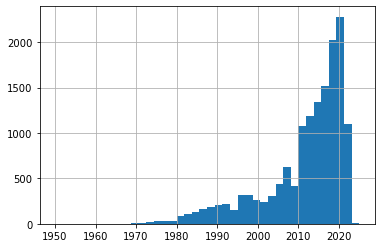

In [8]:
# As baseline, see where our 'Year' values are concentrated
df[df.Year.notnull()].Year.hist(bins=40)

<AxesSubplot:>

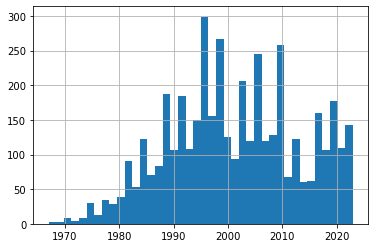

In [9]:
# Visualize frequency of missingness for Abstract column
df[df.Abstract.isnull()].Year.hist(bins=40)

<AxesSubplot:>

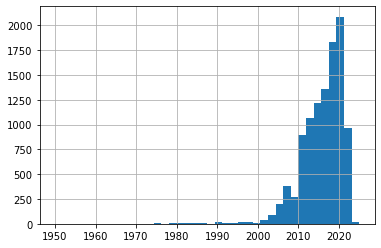

In [10]:
# Compare to frequency of non-missingness for Abstract column
df[df.Abstract.notnull()].Year.hist(bins=40)

In [11]:
len(df[(df.Abstract.notnull())])

17201

In [12]:
# What proportion of non-missing cases occurred after the year 2000?
total = len(df[df.Abstract.notnull()])
numerator = len(df[(df.Abstract.notnull()) & (df.Year>2000)])
prop = round(numerator/total*100, 1)

print(f'Out of {total} grants with Abstracts, {numerator} of them--that\'s {prop}%--made their product after the year 2000.')

Out of 17201 grants with Abstracts, 10390 of them--that's 60.4%--made their product after the year 2000.


<b>Interpretation:</b> Missing cases concentrate in the 1990s and 2000s, while cases with data concentrate more recently--in the 2010s. So it's likely that older grant products weren't required to provide Abstracts, or if they did they were not digitized correctly. Moreover, this means my analysis of Abstracts uses mostly (>60%) recent data since 2000.

## Clean and filter dataset

In [13]:
# Filter and remove nulls
df_small = df[['ID', 'Abstract', 'Year', 'ProductType']].dropna(subset=['Abstract', 'Year'])

# Clean up spacing: replace tabs with spaces (to simplify saving output)
df_small['Abstract'] = df_small['Abstract'].replace(r'\t+', ' ', regex=True)

# Coerce 'Year' to type 'int' (to be safe)
df_small.Year = df_small.Year.astype(int) 

# Fill in null entries with 'NaN'
df_small = df_small.fillna(np.nan)

In [14]:
print("Count of rows, columns in filtered data:", df_small.shape)
print(f"These are the {str(len(df_small.columns))} column names:")
print(", ".join([col for col in df_small.columns]))
print()
df_small.sample(10).iloc[:,:20] # Show first 20 columns of 10 random rows

Count of rows, columns in filtered data: (10514, 4)
These are the 4 column names:
ID, Abstract, Year, ProductType



,ID,Abstract,Year,ProductType
509,22719,original song inspired by participant's conver...,2022,FilmBroadcasts
118,21245,The Museum developed template press releases f...,2021,WebResources
1361,20512,Links to various SENCOTEN tools: How to Prono...,2016,WebResources
368,12370,The question with which Yeats closed his medit...,2015,Articles
6041,11388,"In his well-received CVIC IDEAS, tracing the h...",2007,Books
6310,22316,"In the mid-1800s, daguerreotypist Thomas Easte...",2023,Books
6014,5060,"Jack Levine, George Segal, Audrey Flack, Larry...",2014,Books
705,13548,pp. 359-75,2016,BookSections
2832,21776,forthcoming,2022,Articles
831,17481,An online encyclopedia that brings together sc...,2013,WebResources


## Save combined data to disk

Use tab-separated format to prevent any issues with commas in the text data.

In [15]:
df_small.to_csv(join('../data/', 'NEH_GrantProducts_Combined.tsv'), sep='\t', index=False)